In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

path = r'C:\Users\osr18\Jupyter_notebook\dac\play_store\googleplaystore.csv'
path_1 = r'C:\Users\osr18\Jupyter_notebook\dac\play_store\googleplaystore_user_reviews.csv'

play_temp = pd.read_csv(path)
review_temp = pd.read_csv(path_1)

In [2]:
play_temp.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
play_temp.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [4]:
#play_temp["Installs"].unique()
play_temp["Installs"] = play_temp["Installs"].str.replace(pat=r'[^\w]', repl=r'', regex=True)
play_temp = play_temp.drop(play_temp.loc[play_temp['Installs'] == 'Free'].index)
play_temp['Installs'] = play_temp['Installs'].astype(int)

In [5]:
play_temp['Reviews'] = play_temp['Reviews'].astype(int)

In [6]:
#play_temp['Type'].unique()
play_temp.dropna(subset=['Type'], inplace=True)
type_map = {'Free' : 1, 'Paid' : 2}
play_temp['Type_new'] = play_temp['Type'].map(type_map).astype(int)

In [7]:
play_temp["Price"] = play_temp["Price"].str.replace(pat=r'[^\w]', repl=r'', regex=True)
play_temp['Price'] = play_temp['Price'].astype(int)

In [8]:
#genres_counts = play_temp['Genres'].value_counts()
#genres_counts.loc[genres_counts > 30]

In [9]:
#play_temp['Category'].unique()
category_map = {'ART_AND_DESIGN' : 1, 'AUTO_AND_VEHICLES' : 2, 'BEAUTY' : 3, 
                'BOOKS_AND_REFERENCE' : 4, 'BUSINESS' : 5, 'COMICS' : 6, 'COMMUNICATION' : 7,
                'DATING' : 8, 'EDUCATION' : 9, 'ENTERTAINMENT' : 10, 'EVENTS' : 11, 'FINANCE' : 12,
                'FOOD_AND_DRINK' : 13, 'HEALTH_AND_FITNESS' : 14, 'HOUSE_AND_HOME' : 15,
                'LIBRARIES_AND_DEMO' : 16, 'LIFESTYLE' : 17, 'GAME' : 18, 'FAMILY' : 19, 'MEDICAL' : 20,
                'SOCIAL' : 21, 'SHOPPING' : 22, 'PHOTOGRAPHY' : 23, 'SPORTS' : 24, 'TRAVEL_AND_LOCAL' : 25,
                'TOOLS' : 26, 'PERSONALIZATION' : 27, 'PRODUCTIVITY' : 28, 'PARENTING' : 29, 'WEATHER' : 30,
                'VIDEO_PLAYERS' : 31, 'NEWS_AND_MAGAZINES' : 32, 'MAPS_AND_NAVIGATION' : 33}
play_temp['Category_new'] = play_temp['Category'].map(category_map).astype(int)
#play_temp.groupby(['Category']).mean().sort_values(by=['Rating'], ascending=False)

In [10]:
#play_temp['Content Rating'].unique()
content_rating_map = {'Everyone' : 1, 'Teen' : 2, 'Everyone 10+' : 3, 'Mature 17+' : 4,
                      'Adults only 18+' : 5, 'Unrated' : 6}
play_temp['Content_rating_new'] = play_temp['Content Rating'].map(content_rating_map).astype(int)

In [11]:
play_temp = play_temp.drop(play_temp.loc[play_temp['Category'] == '1.9'].index)

In [12]:
#play_temp_drop = play_temp.dropna(subset=['Rating']) Rating의 NaN 값을 삭제?
play_temp['Rating'] = play_temp.groupby(['Category'])['Rating'].apply(lambda x : x.fillna(x.mean())) 
#카테고리 별 Rating의 평균 값으로 채움

In [13]:
play_temp.isna().sum()

App                   0
Category              0
Rating                0
Reviews               0
Size                  0
Installs              0
Type                  0
Price                 0
Content Rating        0
Genres                0
Last Updated          0
Current Ver           8
Android Ver           2
Type_new              0
Category_new          0
Content_rating_new    0
dtype: int64

In [14]:
play_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10839 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   App                 10839 non-null  object 
 1   Category            10839 non-null  object 
 2   Rating              10839 non-null  float64
 3   Reviews             10839 non-null  int32  
 4   Size                10839 non-null  object 
 5   Installs            10839 non-null  int32  
 6   Type                10839 non-null  object 
 7   Price               10839 non-null  int32  
 8   Content Rating      10839 non-null  object 
 9   Genres              10839 non-null  object 
 10  Last Updated        10839 non-null  object 
 11  Current Ver         10831 non-null  object 
 12  Android Ver         10837 non-null  object 
 13  Type_new            10839 non-null  int32  
 14  Category_new        10839 non-null  int32  
 15  Content_rating_new  10839 non-null  int32  
dtypes: f

In [15]:
category_mean = play_temp.groupby(['Category']).mean().sort_values(by=['Rating'], ascending=True)

<BarContainer object of 33 artists>

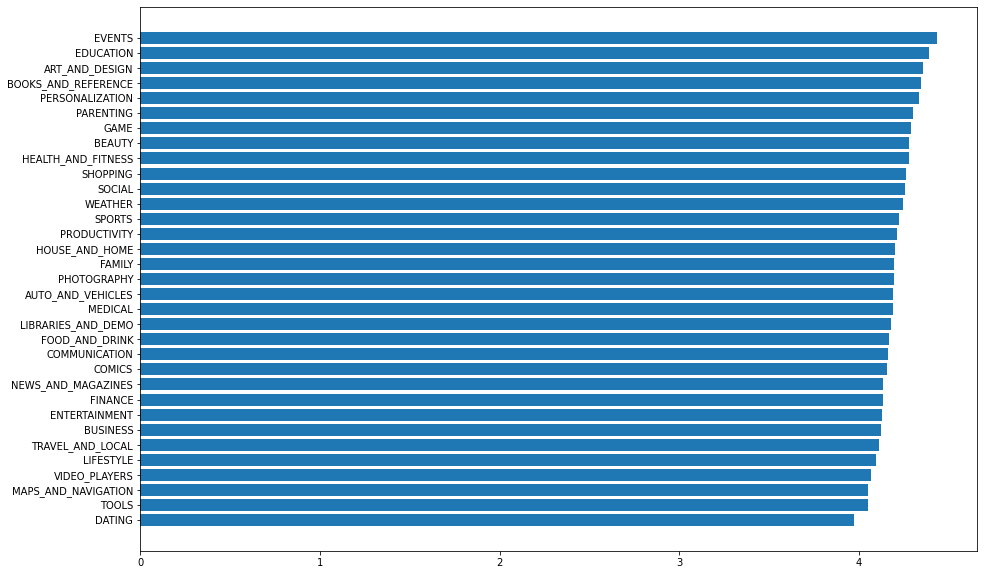

In [16]:
plt.figure(figsize=(15,10))
plt.barh(category_mean.index, category_mean['Rating'])

In [17]:
play_set = play_temp[['Reviews', 'Installs', 'Price', 'Type_new', 'Category_new', 'Content_rating_new', 'Rating']]
play_set.head(5)
#Size, Update 날짜도 추후 비교

,Reviews,Installs,Price,Type_new,Category_new,Content_rating_new,Rating
0,159,10000,0,1,1,1,4.1
1,967,500000,0,1,1,1,3.9
2,87510,5000000,0,1,1,1,4.7
3,215644,50000000,0,1,1,2,4.5
4,967,100000,0,1,1,1,4.3
